## 회귀
* 소득이 증가하면 소비도 증가. 어떤 변수가 다른 변수에 영향을 준다면 두 변수 사이에 선형관계가 있다고 할 수 있음.
* 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘을 Simple Linear Regression이라고 함. 지도학습
* 변수 X와 Y에 대한 정보를 가지고 일차 방정식의 계수 a, b를 찾는 과정이 단순회귀분석 알고리즘

### 회귀 평가 지표
* **MAE**: 실제값과 예측값의 차이를 절대값으로 변환해 평균한 것 <i>mean absolute error</i>
* **MSE**: 실제값과 예측값의 차이를 제곱해 평균한 것 <i>mean squared error</i>
* **RMSE**: MSE에 루트를 씌운 것(실제 오류 평균보다 커지는 것 보정) <i>root mean squared error</i>
* **R square**: 분산 기반으로 예측 성능을 평가. 실제값의 분산 대비 예측값의 분산 비율을 지표로 함 

[참고1](https://blog.naver.com/PostView.nhn?blogId=bya135&logNo=222228358219&parentCategoryNo=&categoryNo=24&viewDate=&isShowPopularPosts=true&from=search) 지도학습: 회귀모델의 평가지표 - MSE, MAE, RMSE, R2, R2adj + 파이썬으로 구하는 법
<br>[참고2](https://libertegrace.tistory.com/entry/Evaluation2) 회귀의 성능 평가 지표

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('auto-mpg.xlsx', engine='openpyxl')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [5]:
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


In [6]:
ndf.info()

#horsepower이 object로 되어있음.;; 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         398 non-null    float64
 1   cylinders   398 non-null    int64  
 2   horsepower  398 non-null    object 
 3   weight      398 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 12.6+ KB


In [7]:
ndf.horsepower.value_counts()

150    22
90     20
88     19
110    18
100    17
       ..
61      1
93      1
148     1
152     1
82      1
Name: horsepower, Length: 94, dtype: int64

In [8]:
ndf.horsepower.unique()
#?가 있음

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [9]:
ndf.horsepower.replace('?', np.nan, inplace=True) #null로 replace
ndf.dropna(subset=['horsepower'], axis=0, inplace= True) #null값 삭제
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.3 KB


In [10]:
ndf.to_pickle('auto-mpg.pkl') #전처리 된 데이터프레임 피클로 저장
ndf = pd.read_pickle('auto-mpg.pkl')
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


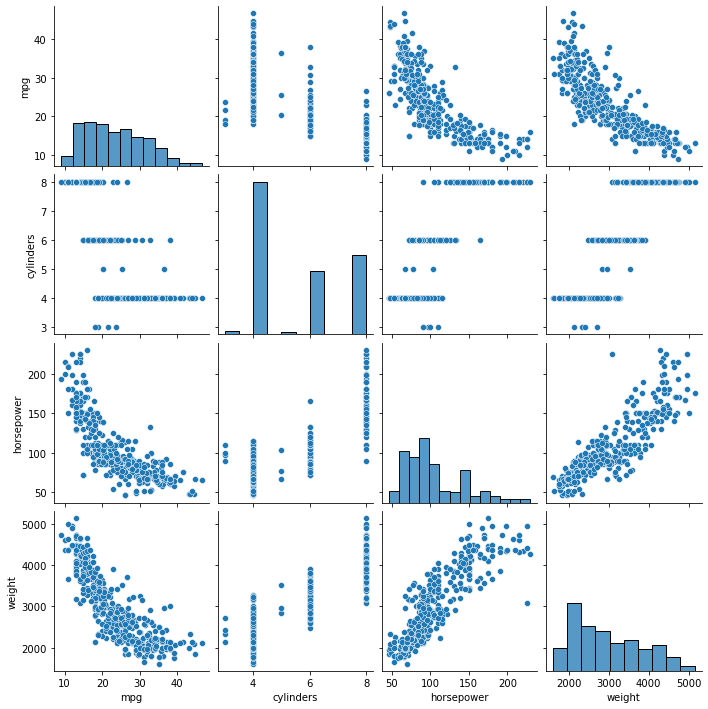

In [11]:
sns.pairplot(ndf)

In [12]:
X = ndf[['weight']] #독립변수
y = ndf[['mpg']] #종속변수

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)
print(len(X_train), len(X_test))

#7:3으로 잘 나뉨

274 118


<AxesSubplot:title={'center':'RegPlot'}, xlabel='weight', ylabel='mpg'>

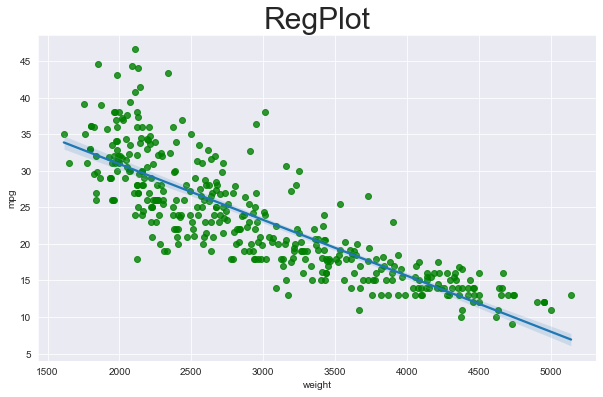

In [13]:
sns.set_style('darkgrid')
fig,axes = plt.subplots(1,1,figsize=(10,6))
plt.title('RegPlot', fontsize=30)
sns.regplot(ax=axes, x='weight', y='mpg', data =ndf, scatter_kws={'color':'green'})

In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() #알고리즘객체만들기
lr.fit(X_train, y_train) #학습시키기
y_preds = lr.predict(X_test) #예측능력을가짐 .. 검증용데이터넣기

In [15]:
from sklearn.metrics import mean_squared_error, r2_score  #평가 mse, rmse, r2score: 이모델이얼마나설명력을갖는지
#rmse는 없음,, 그냥 mse에 루트 씌우면됨

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2_score = r2_score(y_test, y_preds)

print(f'MSE:{round(mse, 4)} \n\nRMSE:{round(rmse,4)} \n\nR2 Score:{round(r2_score, 4)}')

MSE:22.169 

RMSE:4.7084 

R2 Score:0.6411


In [16]:
#회귀식의 기울기, 절편
print(lr.coef_) #기울기
print(lr.intercept_) #절편

[[-0.00762163]]
[45.9712177]


<AxesSubplot:ylabel='Density'>

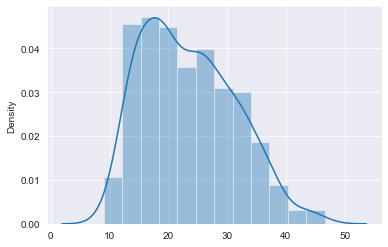

In [17]:
sns.distplot(y)

<AxesSubplot:ylabel='Density'>

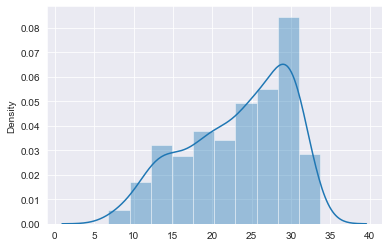

In [18]:
y_hat = lr.predict(X)
sns.distplot(y_hat)

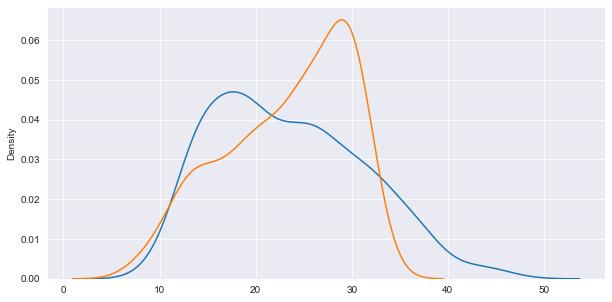

In [19]:
#실제값은 왼쪽으로 편향, 예측값은 오른쪽으로 편향되는 경향을 보임 -> 모형의 오차를 줄일 필요가 있음
plt.figure(figsize=(10,5))
ax1 = sns.distplot(y, hist=False, label='y')
ax2 = sns.distplot(y_hat, hist=False, label='y_hat')

## 다항 회귀분석
* 직선보다 곡선으로 설명하는 것이 적합할 경우 다항 함수를 사용하면 복잡한 곡선 형태의 회귀선을 표현할 수 있음
* 2차 함수 이상의 다항 함수를 이용하여 두 변수 간의 선형관계를 설명하는 알고리즘
* 다항 회귀도 선형회귀임. 선형/비선형 회귀를 나누는 기준은 회귀계수가 선형/비선형인지에 따르며 독립변수의 선형/비선형 여부와는 무관<br>
https://chana.tistory.com/entry/%ED%95%B8%EC%A6%88%EC%98%A8-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D5-%EB%8B%A4%ED%95%AD-%ED%9A%8C%EA%B7%80

In [20]:
ndf = pd.read_pickle('auto-mpg.pkl')
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


In [21]:
from sklearn.preprocessing import PolynomialFeatures #다항식 변환
# poly = PolynomialFeatures(degree=2)
poly = PolynomialFeatures(degree=3)

X_train_poly = poly.fit_transform(X_train) #X_train이 poly에 저장이됨 

#원 데이터, 변환데이터
print(X_train.shape, X_train_poly.shape, '\n')
print(poly.get_feature_names(), '\n')
print(X_train_poly[:5])

(274, 1) (274, 4) 

['1', 'x0', 'x0^2', 'x0^3'] 

[[1.00000000e+00 2.12000000e+03 4.49440000e+06 9.52812800e+09]
 [1.00000000e+00 4.49900000e+03 2.02410010e+07 9.10642635e+10]
 [1.00000000e+00 1.84500000e+03 3.40402500e+06 6.28042612e+09]
 [1.00000000e+00 2.04500000e+03 4.18202500e+06 8.55224112e+09]
 [1.00000000e+00 1.98500000e+03 3.94022500e+06 7.82134662e+09]]


In [22]:
pr = LinearRegression()
pr.fit(X_train_poly, y_train) #다항식으로변환해서 fit

#설계한 모형의 오차가 작다면 r_square가 커짐
X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly, y_test)
r_square

0.6356553553497841

In [23]:
print(pr.coef_)
print(pr.intercept_)

[[ 0.00000000e+00 -2.60647726e-02  3.78336250e-06 -1.78477552e-10]]
[70.4971478]


InvalidIndexError: (slice(None, None, None), None)

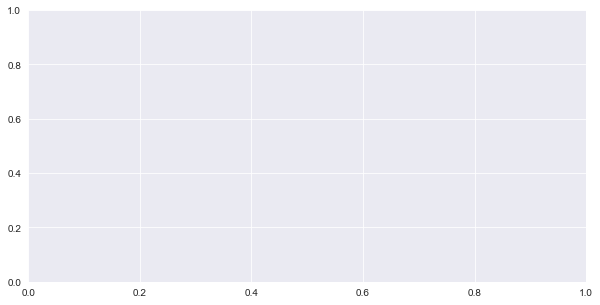

In [24]:
y_hat_test = pr.predict(X_test_poly)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(X_train, y_train, 'o', label = 'Train Data') #데이터 분포 
ax.plot(X_test, y_hat_test, 'r+', label = 'Predicted Value') #모형이 학습한 회귀선

ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')

Text(0, 0.5, 'mpg')

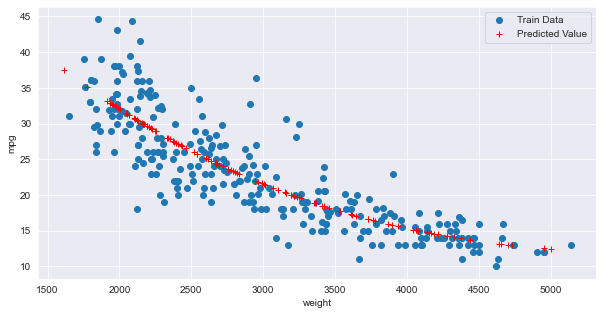

In [26]:
y_hat_test = pr.predict(X_test_poly)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train.values[:,:], y_train.values[:,:], 'o', label='Train Data') # 데이터 분포
ax.plot(X_test.values[:,:], y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')

## 다중 회귀분석
* 여러 개의 독립 변수가 종속 변수에 영향을 주고 선형 관계를 갖는 경우에 다중회귀분석을 사용
* 다중 회귀분석 알고리즘은 각 독립 변수의 계수와 상수항에 적절한 값들을 찾아서 모형을 완성. 지도학습


In [ ]:
X = ndf.drop('mpg',axis=1)
y = ndf['mpg']

X_train,X_test,y_train,y_test = train.

In [27]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)

mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
r_square = lr.score(X_test,y_test)
print(f'MSE:{round(mse,4)},RMSE:{round(rmse,4)}, R_Square:{round(r_square,4)}')

MSE:22.169,RMSE:4.7084, R_Square:0.6411


In [28]:
print(lr.coef_)
print(lr.intercept_)

[[-0.00762163]]
[45.9712177]


### 과제_0915_2.
아래 boston 데이터 셋으로 보스턴 주택 가격 예측 모델을 만들고 평가하세요.

In [30]:
from scipy import stats
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.keys())
bdf = pd.DataFrame(boston.data, columns=boston.feature_names)
bdf.head()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
